In [1]:
import gmsh as gm
import pyvista as pv
import pygmsh as pg
import meshio as mo

from pathlib import Path 

PATH_MESH = Path().absolute().joinpath('..', 'mesh', 'monopoleFlow', 'mach0.2', 'circMesh.geo')
PATH_SAVE_MESH = PATH_MESH.parent.parent.joinpath('msh')
PATH_SAVE_MESH.mkdir(exist_ok=True)

if not PATH_MESH.exists():
    assert False, 'File not found'

In [6]:
import numpy as np

# a = mo.read(PATH_MESH.with_suffix('.msh'))
a = mo.read(PATH_MESH.with_name('miolo.msh'))
# Obter as informações da malha
points = a.points
cells = a.cells

# Definir a direção da reta
direction = np.array([100, 0, 0])

# Calcular a interseção com a malha
intersections = 0
for cell in cells:
    for vertex in cell.data:
        print(len(cell.data))
        if np.dot(points[vertex], direction).all() == 0:
            intersections += 1

print(f"Número de elementos interceptados: {intersections}")


28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
28998
289

In [ ]:
import meshio

# Carregar o arquivo .msh
mesh = mo.read(PATH_MESH.with_name('miolo.msh'))

# Definir a linha de interceptação
ponto_inicial = [0, 0, 0]  # Coordenadas do ponto inicial da linha
direcao = [10, 0, 0]  # Vetor direção da linha

# Encontrar os elementos interceptados
interceptados = []
for cell in mesh.cells:
    if is_intercepted(cell, ponto_inicial, direcao):
        interceptados.append(cell)

# Contar o número de elementos interceptados
num_interceptados = len(interceptados)

print(f"O número de elementos interceptados é: {num_interceptados}")

In [7]:
import pyvista as pv

# Carregar o arquivo .msh
mesh = pv.read(PATH_MESH.with_name('miolo.msh'))

# Definir a linha de interceptação
ponto_inicial = [0, 0, 0]  # Coordenadas do ponto inicial da linha
direcao = [100, 0, 0]  # Vetor direção da linha

# Encontrar os elementos interceptados
interceptados = mesh.ray_trace(ponto_inicial, direcao)
# Contar o número de elementos interceptados
num_interceptados = len(interceptados)

print(f"O número de elementos interceptados é: {num_interceptados}")

AttributeError: 'UnstructuredGrid' object has no attribute 'ray_trace'

c:\Users\WKCARDO\Documents\Widmark\TCC\Aeroacoustics-Resonators\.venv\lib\site-packages\pyvista\jupyter\notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'pkg_resources'

Falling back to a static output.
  warnings.warn(


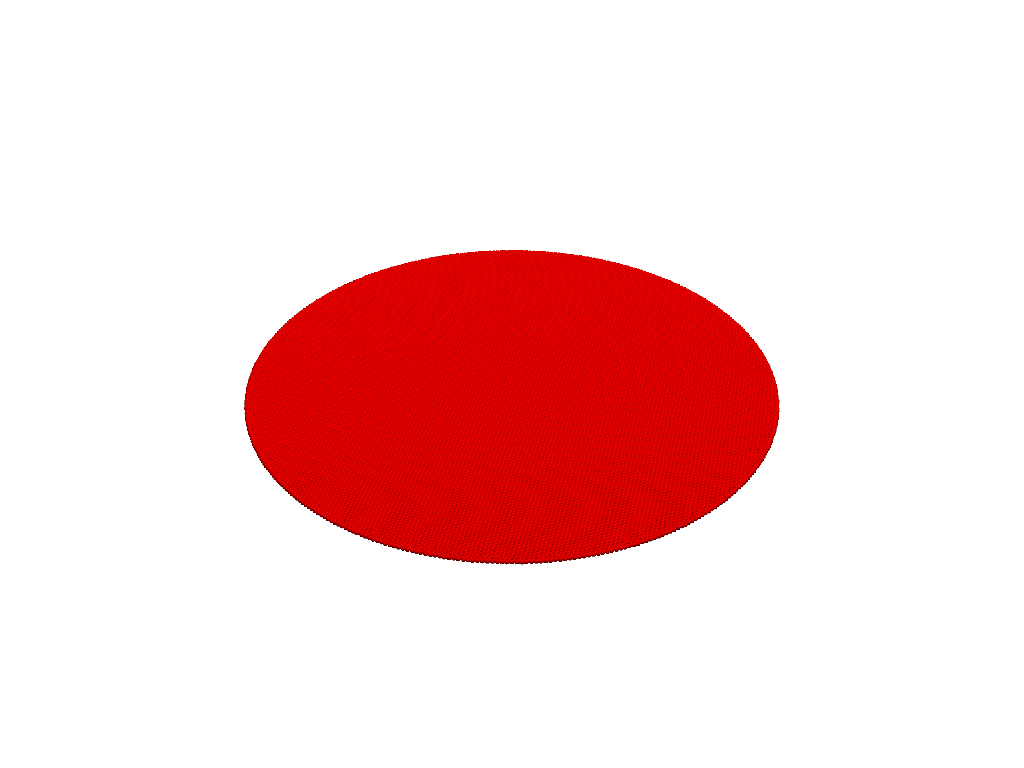

In [19]:
mesh.
centers = mesh.cell_centers()
pl = pv.Plotter()
# actor = pl.add_mesh(mesh, show_edges=True)
actor = pl.add_points(
    centers.,
    render_points_as_spheres=True,
    color='red',
    point_size=5,
)
pl.show()

In [6]:
gm.initialize()
gm.open(PATH_MESH.as_posix())

# gm.write(PATH_SAVE_MESH.joinpath('circMesh.vtk').as_posix())
gm.fltk.run()

c:\Users\WKCARDO\Documents\Widmark\TCC\Aeroacoustics-Resonators\.venv\lib\site-packages\pyvista\jupyter\notebook.py:33: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\WKCARDO\Documents\Widmark\TCC\Aeroacoustics-Resonators\.venv\lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


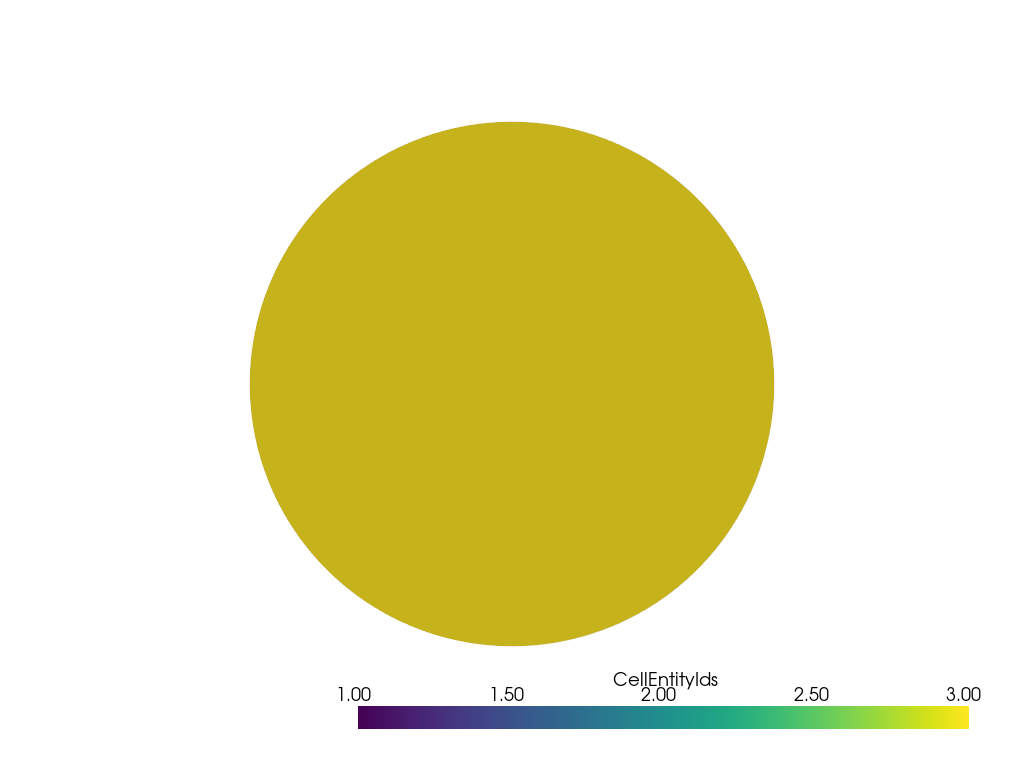

In [ ]:
mesh = pv.UnstructuredGrid(PATH_SAVE_MESH.joinpath('circMesh2.vtk'))
centers = mesh.cell_centers()

pl = pv.Plotter(off_screen=True)
ray = pv.Line([0,0,0], [100, 0,0])
actor = pl.add_mesh(mesh)
pl.add_mesh(ray, color="blue", line_width=5, label="Ray Segment")
# actor = pl.add_points(
#     centers,
#     render_points_as_spheres=True,
#     color ='red',
#     point_size = 20
# )
pl.camera_position = 'xy'
pl.show()

PolyData (0x1f56a486c20)
  N Cells:    250866
  N Points:   250866
  N Strips:   0
  X Bounds:   -4.000e+02, 4.000e+02
  Y Bounds:   -4.000e+02, 4.000e+02
  Z Bounds:   0.000e+00, 1.000e+00
  N Arrays:   2

c:\Users\WKCARDO\Documents\Widmark\TCC\Aeroacoustics-Resonators\.venv\lib\site-packages\pyvista\jupyter\notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui'

Falling back to a static output.
  warnings.warn(


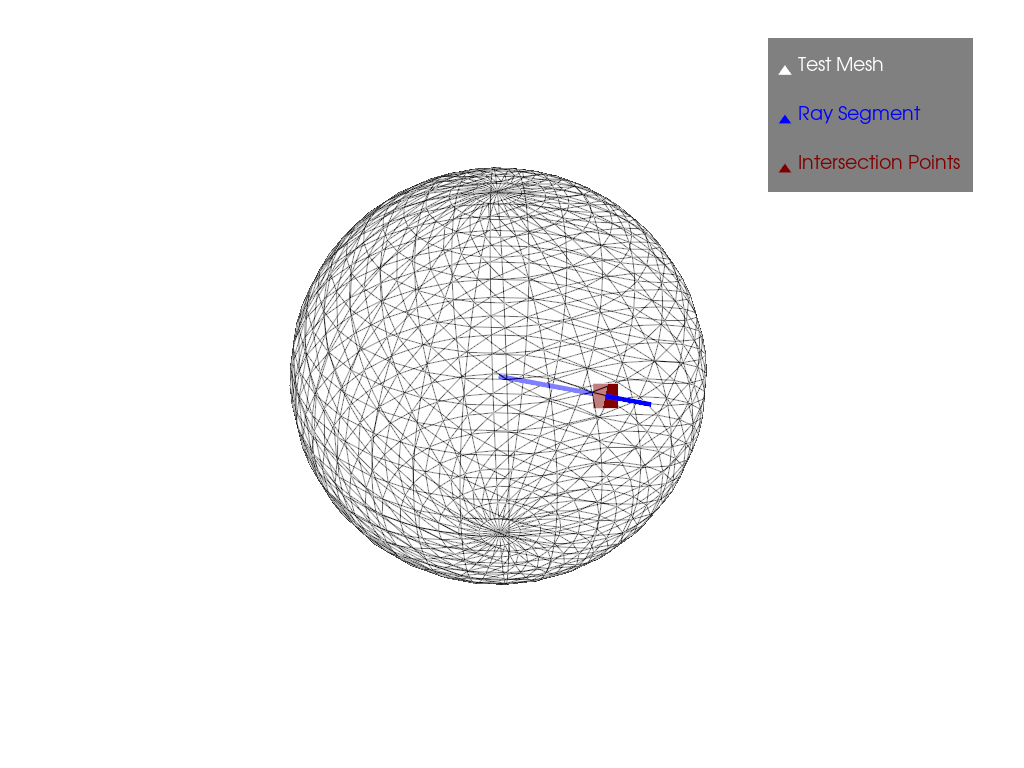

In [ ]:

# Create source to ray trace
sphere = pv.Sphere(radius=0.85)

# Define line segment
start = [0, 0, 0]
stop = [0.25, 1, 0.5]

# Perform ray trace
points, ind = sphere.ray_trace(start, stop)

# Create geometry to represent ray trace
ray = pv.Line(start, stop)
intersection = pv.PolyData(points)

# Render the result
p = pv.Plotter(off_screen=True)
p.add_mesh(sphere, show_edges=True, opacity=0.5, color="w", lighting=False, label="Test Mesh")
p.add_mesh(ray, color="blue", line_width=5, label="Ray Segment")
p.add_mesh(intersection, color="maroon", point_size=25, label="Intersection Points")
p.add_legend()
p.show()
